# Data

(85273, 576)
(85273,)
Total occurences of 0 in array: 5923
Total occurences of 1 in array: 6742
Total occurences of 2 in array: 5958
Total occurences of 3 in array: 30655
Total occurences of 4 in array: 5842
Total occurences of 5 in array: 5421
Total occurences of 6 in array: 5918
Total occurences of 7 in array: 6265
Total occurences of 8 in array: 600
Total occurences of 9 in array: 5949
Total occurences of no digit in array: 6000


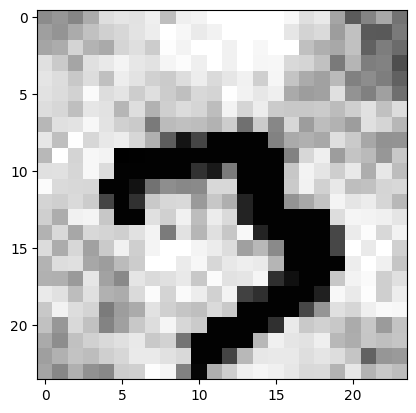

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import time
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix


startProgram = time.process_time()

# ctrl plus stjerne kommenterer alt inne i block
X = np.load("MNIST-images.npy")
y = np.load("MNIST-labels.npy")

matplotlib.pyplot.imshow(X[230], cmap="Greys") 

X = X.reshape(X.shape[0], 576)



print(X.shape)
print(y.shape)


# Count occurrence of element '3' in numpy array
for i in range (0, 11):
    count = np.count_nonzero(y == i)
    if(i == 10):
        print("Total occurences of no digit in array:", count)
        break
    print("Total occurences of", i, "in array:", count)



# Splitting the data

Train: X=(68217, 576), y=(68217,)
Test: X=(8528, 576), y=(8528,)
Validate: X=(8528, 576), y=(8528,)
Train: X=(68217, 576), y=(68217,)
Test: X=(8528, 576), y=(8528,)
Validate: X=(8528, 576), y=(8528,)


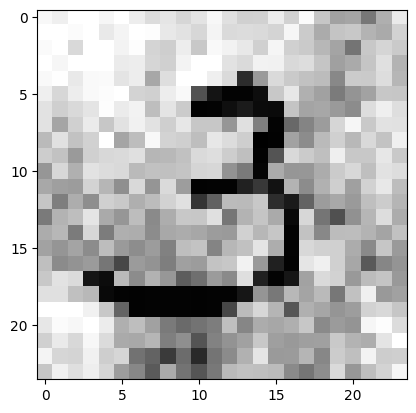

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.10)/0.90, random_state=41)


print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
print('Validate: X=%s, y=%s' % (X_val.shape, y_val.shape))

# Normalize the datasets. By dividing on max value wich here is 255 so we get a value between 0 and 1

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255


print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
print('Validate: X=%s, y=%s' % (X_val.shape, y_val.shape))


matplotlib.pyplot.imshow(X_train[0].reshape(24,24), cmap='Greys') #Reshape to 24 by 24 when showing img

# K nearest neighbor

Score for k=  1 with weighting uniform is: 0.8067542213883677
Score for k=  1 with weighting distance is: 0.8067542213883677
Score for k=  2 with weighting uniform is: 0.8239915572232646
Score for k=  2 with weighting distance is: 0.8067542213883677
Score for k=  3 with weighting uniform is: 0.7985459662288931
Score for k=  3 with weighting distance is: 0.7996013133208255
Score for k=  4 with weighting uniform is: 0.8116791744840526
Score for k=  4 with weighting distance is: 0.8034709193245778
Score for k=  5 with weighting uniform is: 0.7984287054409006
Score for k=  5 with weighting distance is: 0.7967870544090057
Score for k=  6 with weighting uniform is: 0.8000703564727955
Score for k=  6 with weighting distance is: 0.7950281425891182
Score for k=  10 with weighting uniform is: 0.787875234521576
Score for k=  10 with weighting distance is: 0.7868198874296435
Score for k=  15 with weighting uniform is: 0.7733348968105066
Score for k=  15 with weighting distance is: 0.77239681050656

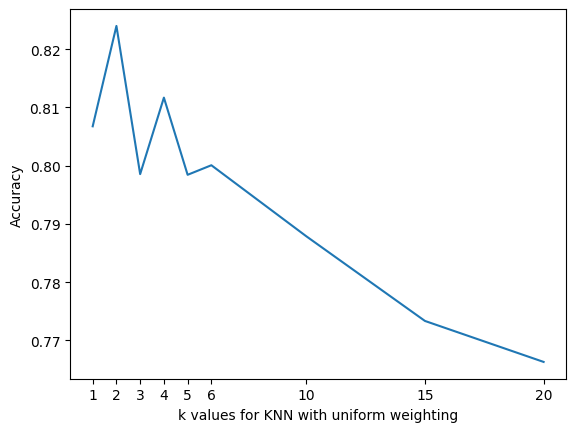

The best score with uniform weighting is  82.4 % with number of k= 2


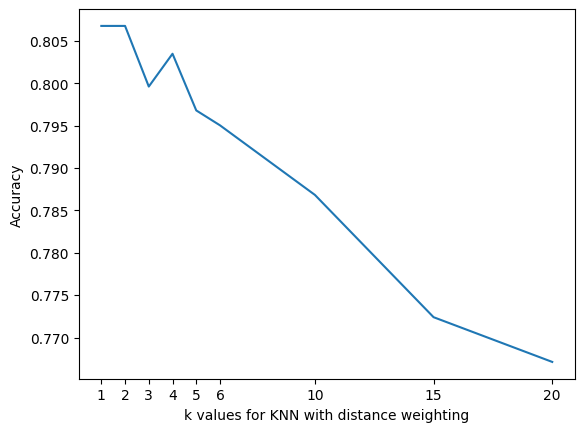

The best score with distance weighting is  80.68 % with number of k = 1
The best knn model is a model with weighting:  uniform and with number of neighbors:  2
the best model give us an accuracy of  82.4 %
time to run the best knn classifier with best hyperparameters:  0.046875 seconds
The confusion matrix for the best knn model


C:\Users\sande\anaconda3\envs\INF264\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


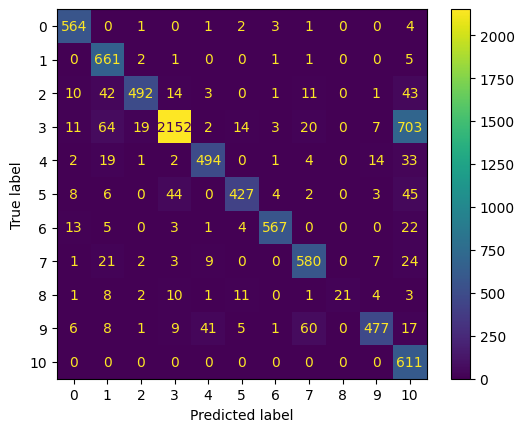

In [3]:
neighbours = [1, 2, 3, 4, 5, 6, 10, 15, 20]
weightOptions = ['uniform', 'distance']
accUniform = []
accDistance = []

for i in neighbours:
    for w in weightOptions:
        knn = KNeighborsClassifier(algorithm='auto',n_neighbors=i, weights=w)
        knn.fit(X_train, y_train)
        accuracyKnn = knn.score(X_val, y_val)
        print("Score for k= ", i, "with weighting", w, "is:", accuracyKnn)
        if(w == 'uniform'):
            accUniform.append([accuracyKnn])
        
        if(w=='distance'):
            accDistance.append([accuracyKnn])
        


plt.plot(neighbours, accUniform)
plt.xlabel('k values for KNN with uniform weighting')
plt.xticks(neighbours)
plt.ylabel('Accuracy')
plt.show()

maxValueUniform = np.max(accUniform)
maxValueIndexU = accUniform.index(maxValueUniform)
bestkNeighboursU = neighbours[maxValueIndexU]

print("The best score with uniform weighting is ", round(maxValueUniform*100,2), "% with number of k=", bestkNeighboursU)

plt.plot(neighbours, accDistance)
plt.xlabel('k values for KNN with distance weighting')
plt.xticks(neighbours)
plt.ylabel('Accuracy')
plt.show()

maxValueDistance = np.max(accDistance)
maxValueIndexD = accUniform.index(maxValueDistance)
bestkNeighboursD = neighbours[maxValueIndexD]

print("The best score with distance weighting is ", round(maxValueDistance*100,2), "% with number of k =", bestkNeighboursD)

best_models = []

if(maxValueUniform > maxValueDistance):
    bestKnnAccuracy = maxValueUniform
    bestKnnWeight = 'uniform'
    bestNeighbour = bestkNeighboursU
if(maxValueUniform < maxValueDistance):
    bestKnnAccuracy = maxValueDistance
    bestKnnWeight = 'distance'
    bestNeighbour = bestkNeighboursD
if(maxValueUniform == maxValueDistance):
    bestKnnWeight = random.choice(['uniform', 'distance'])
    if(bestCriterion == 'uniform'):
        bestNeighbour = bestkNeighboursU
        bestKnnAccuracy = maxValueUniform
    if(bestCriterion == 'distance'):
        bestNeighbour = bestkNeighboursD
        bestKnnAccuracy = maxValueDistance

best_models.append([bestKnnAccuracy,bestKnnWeight,bestNeighbour, "KNN"])
    
print("The best knn model is a model with weighting: ", bestKnnWeight, "and with number of neighbors: ", bestNeighbour )
print("the best model give us an accuracy of ", round(bestKnnAccuracy*100,2),"%")    
startBestKnn = time.process_time() #measure time of best knn classifier to compare to others.

knnBest = KNeighborsClassifier(algorithm='auto',n_neighbors=bestNeighbour, weights=bestKnnWeight)
knnBest.fit(X_train, y_train)    

timeBestKnn = time.process_time() - startBestKnn
print("time to run the best knn classifier with best hyperparameters: ", timeBestKnn, "seconds")

print("The confusion matrix for the best knn model")
plot_confusion_matrix(knnBest, X_test, y_test)  
plt.show()   


We can see that we have alot of mistakes on the number 3, this is probably because the number of 3 we have in the data set is much bigger than other numbers. We have a total occurence of 30655 3s in the entire data set compared to the other digits that have around five to six thousand occurances. This means that we get a higher numner of mistakes on the digit '3' compared to other digits. We note this down and continue with the other classifiers to see if they can solve the problem. One reason for this can be that knn is a non training algorithm so it does not train itself any more on a digit that occurs often than the others

# Decision tree

Decision tree Score for max_depth =  10 with criterion gini is: 0.7440196998123827
Decision tree Score for max_depth =  10 with criterion entropy is: 0.7491791744840526
Decision tree Score for max_depth =  13 with criterion gini is: 0.7695825515947468
Decision tree Score for max_depth =  13 with criterion entropy is: 0.7829502814258912
Decision tree Score for max_depth =  15 with criterion gini is: 0.7777908067542214
Decision tree Score for max_depth =  15 with criterion entropy is: 0.7851782363977486
Decision tree Score for max_depth =  16 with criterion gini is: 0.7762664165103189
Decision tree Score for max_depth =  16 with criterion entropy is: 0.7823639774859287
Decision tree Score for max_depth =  17 with criterion gini is: 0.7783771106941839
Decision tree Score for max_depth =  17 with criterion entropy is: 0.787640712945591
Decision tree Score for max_depth =  18 with criterion gini is: 0.775562851782364
Decision tree Score for max_depth =  18 with criterion entropy is: 0.77861

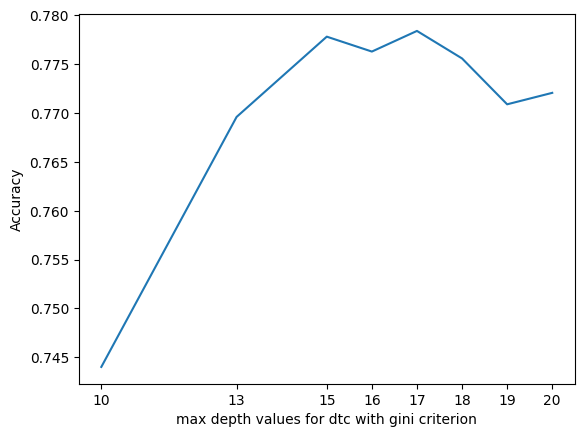

The best score with GINI criterion is  77.84 % with max depth of  17


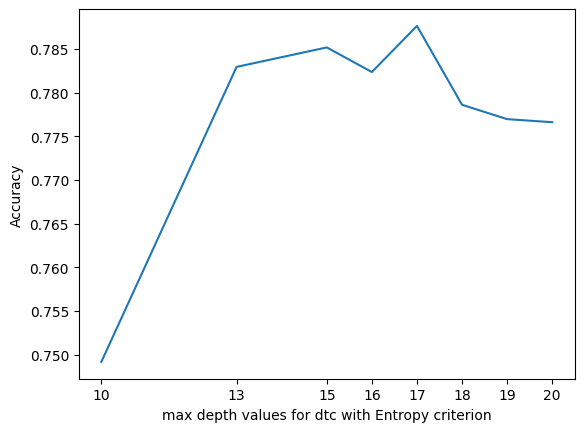

The best score with Entropy criterion is  78.76 % with max depth of  17
The best dtc model is a model with criterion:  entropy and with max depth:  17
The best model give us an accuracy of  78.76 %
time to run the best dtc classifier with best hyperparameters:  46.40625 Seconds
The confusion matrix for the best dtc model


C:\Users\sande\anaconda3\envs\INF264\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


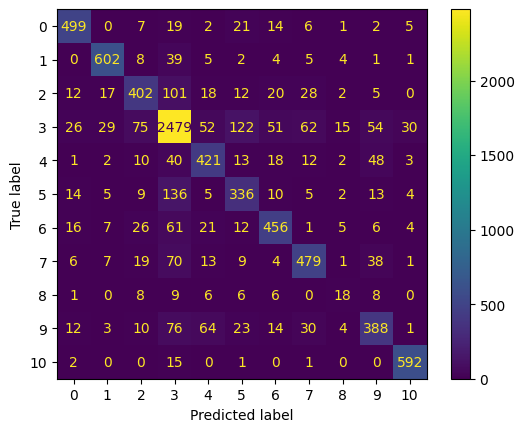

In [4]:

criterions = ['gini', 'entropy']
depths = [10, 13, 15, 16, 17, 18, 19, 20]  

accGINI = []
accEntropy = []

for i in depths:
    for c in criterions:
        clf = DecisionTreeClassifier(criterion = c, max_depth = i)
        clf.fit(X_train, y_train)
        accuracyCLF = clf.score(X_val, y_val)
        print("Decision tree Score for max_depth = ", i, "with criterion", c, "is:", accuracyCLF)
        if(c == 'gini'):
            accGINI.append([accuracyCLF])
        
        if(c=='entropy'):
            accEntropy.append([accuracyCLF])


plt.plot(depths, accGINI)
plt.xticks(depths)
plt.xlabel('max depth values for dtc with gini criterion')
plt.ylabel('Accuracy')
plt.show()

maxValueGINI= np.max(accGINI)
maxValueIndexG = accGINI.index(maxValueGINI)
bestDepthG = depths[maxValueIndexG]

print("The best score with GINI criterion is ", round(maxValueGINI*100,2), "% with max depth of ", bestDepthG)


plt.plot(depths, accEntropy)
plt.xticks(depths)
plt.xlabel('max depth values for dtc with Entropy criterion')
plt.ylabel('Accuracy')
plt.show()

maxValueEntropy= np.max(accEntropy)
maxValueIndexE = accEntropy.index(maxValueEntropy)
bestDepthE = depths[maxValueIndexE]

print("The best score with Entropy criterion is ", round(maxValueEntropy*100,2), "% with max depth of ", bestDepthE)



if(maxValueGINI > maxValueEntropy):
    bestDtcAccuracy = maxValueGINI
    bestCriterion = 'gini'
    bestDepth = bestDepthG
if(maxValueGINI < maxValueEntropy):
    bestDtcAccuracy = maxValueEntropy
    bestCriterion = 'entropy'
    bestDepth = bestDepthE
if(maxValueGINI == maxValueEntropy):
    bestCriterion = random.choice(['gini', 'entropy'])
    if(bestCriterion == 'gini'):
        bestDtcAccuracy = maxValueGINI
        bestDepth = bestDepthG
    if(bestCriterion == 'entropy'):
        bestDtcAccuracy = maxValueEntropy
        bestDepth = bestDepthE

best_models.append([bestDtcAccuracy,bestCriterion,bestDepth, "DTC"])
    
print("The best dtc model is a model with criterion: ", bestCriterion, "and with max depth: ", bestDepth)
print("The best model give us an accuracy of ", round(bestDtcAccuracy*100,2), "%")    
startBestDtc = time.process_time() #measure time of best knn classifier to compare to others.

dtcBest = DecisionTreeClassifier(criterion = bestCriterion, max_depth = bestDepth)
dtcBest.fit(X_train, y_train)    

timeBestDtc = time.process_time() - startBestDtc
print("time to run the best dtc classifier with best hyperparameters: ", timeBestDtc, "Seconds")

print("The confusion matrix for the best dtc model")
plot_confusion_matrix(dtcBest, X_test, y_test)  
plt.show()  



Altorugh we have a worse accurasy and longer running time than the best knn classifier we found, we did solve all the wrong predictions on the dgit 3. This can suggest that our assumption that using a non training algorithm like knn can lead to alot of wrong predictions on digits that occur alot compared to a training algorithm like decsion tree. We still have some ways to go to get a better accuracy. We try another classifier.

# Random forrest

Random forrest Score for numb estimators =  50 with criterion gini is: 0.9064258911819888
Random forrest Score for numb estimators =  50 with criterion entropy is: 0.899624765478424
Random forrest Score for numb estimators =  100 with criterion gini is: 0.9104127579737336
Random forrest Score for numb estimators =  100 with criterion entropy is: 0.9032598499061913
Random forrest Score for numb estimators =  150 with criterion gini is: 0.9141651031894934
Random forrest Score for numb estimators =  150 with criterion entropy is: 0.9060741088180112
Random forrest Score for numb estimators =  200 with criterion gini is: 0.913109756097561
Random forrest Score for numb estimators =  200 with criterion entropy is: 0.9079502814258912


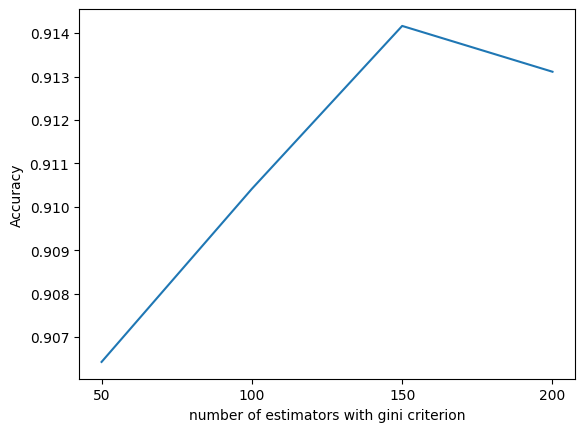

The best score with GINI criterion is  91.42 % with number of estimators  150


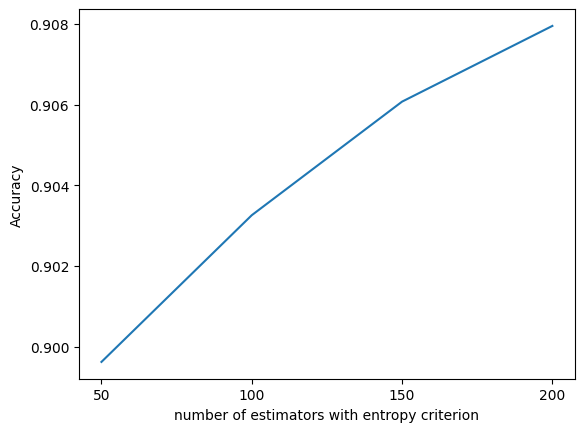

The best score with Entropy criterion is  90.8 % withumber of estimators  200
The best rfc model is a model with criterion:  gini with number of estimators: 150
The best model give us an accuracy of  91.42 %
time to run the best rfc classifier with best hyperparameters:  186.640625 Seconds
The confusion matrix for the best rfc model


C:\Users\sande\anaconda3\envs\INF264\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


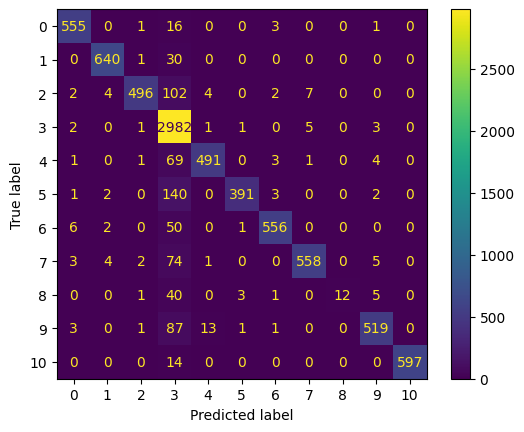

Entire program takes  1797.359375 to run


In [5]:
nEstimators = [50, 100, 150, 200]
criterionsF = ['gini', 'entropy']

accFgini = []
accFentropy = []

for i in nEstimators:
    for c in criterionsF:
        rfc = RandomForestClassifier(n_estimators = i, criterion = c)
        rfc.fit(X_train, y_train)
        accuracyRFC = rfc.score(X_val, y_val)
        print("Random forrest Score for numb estimators = ", i, "with criterion", c, "is:", accuracyRFC)
        if(c == 'gini'):
            accFgini.append([accuracyRFC])
        if(c=='entropy'):
            accFentropy.append([accuracyRFC])


plt.plot(nEstimators, accFgini)
plt.xticks(nEstimators)
plt.xlabel('number of estimators with gini criterion')
plt.ylabel('Accuracy')
plt.show()

maxValueFgini= np.max(accFgini)
maxValueIndexFg = accFgini.index(maxValueFgini)
bestEstimatG = nEstimators[maxValueIndexFg]

print("The best score with GINI criterion is ", round(maxValueFgini*100,2), "% with number of estimators ", bestEstimatG)


plt.plot(nEstimators, accFentropy)
plt.xticks(nEstimators)
plt.xlabel('number of estimators with entropy criterion')
plt.ylabel('Accuracy')
plt.show()

maxValueFentropy= np.max(accFentropy)
maxValueIndexFe = accFentropy.index(maxValueFentropy)
bestEstimatE = nEstimators[maxValueIndexFe]

print("The best score with Entropy criterion is ", round(maxValueFentropy*100,2), "% withumber of estimators ", bestEstimatE)



if(maxValueFgini > maxValueFentropy):
    bestRfcAccuracy = maxValueFgini
    bestCriterionF = 'gini'
    bestEstimat = bestEstimatG
if(maxValueFgini < maxValueFentropy):
    bestCriterionF = 'entropy'
    bestRfcAccuracy = maxValueFentropy
    bestEstimat = bestEstimatE
if(maxValueFgini == maxValueFentropy):
    bestCriterionF = random.choice(['gini', 'entropy'])
    if(bestCriterionF == 'gini'):
        bestRfcAccuracy = maxValueFgini
        bestEstimat = bestEstimatG
    if(bestCriterionF == 'entropy'):
        bestRfcAccuracy = maxValueFentropy
        bestEstimat = bestEstimatE

best_models.append([bestRfcAccuracy,bestCriterionF,bestEstimat, "RFC"])
    
print("The best rfc model is a model with criterion: ", bestCriterionF, "with number of estimators:", bestEstimat)
print("The best model give us an accuracy of ", round(bestRfcAccuracy*100,2),"%")   

startBestRfc = time.process_time() #measure time of best knn classifier to compare to others.

rfcBest = RandomForestClassifier(n_estimators = bestEstimat, criterion = bestCriterionF)
rfcBest.fit(X_train, y_train)    

timeBestRfc = time.process_time() - startBestRfc
print("time to run the best rfc classifier with best hyperparameters: ", timeBestRfc, "Seconds")

print("The confusion matrix for the best rfc model")
plot_confusion_matrix(rfcBest, X_test, y_test)  
plt.show()



timeProgram = time.process_time() - startBestDtc

print("Entire program takes ", timeProgram, "to run")

We can see that in the column of the digit 3 we have a lot of values; this means that the model predicts 3 on a lot of the other digits. It could seem that if we flattened the data so that we had equal somewhat number of digits and reduced the amount of digit 3 we could improve the accuracy for the models. From this confusion matrix we see that most of the loss in accuracy is from the digit 3.

# Getting the best model

In [6]:
best_accuracy = 0
best_crit = None
best_numb = 0
best_name = None

for model in best_models:
    if model[0] > best_accuracy:
        best_accuracy = model[0]
        best_crit = model[1]
        best_numb = model[2]
        best_name = model[3]
        
clf = None        
        
if(best_name == "KNN"):
    print("The best classifier for this data set is ---K nearest neighbors---")
    print("with n_neigbors ", best_numb, " and weighting ", best_crit)
    print("with an accuracy percent of ", round(best_accuracy*100,2))
    clf = knnBest
    
if(best_name == "DTC"):
    print("The best classifier for this data set is ---Decision tree classifier---")
    print("with max_depth ", best_numb, " and criterion ", best_crit)
    print("with an accuracy percent of ", round(best_accuracy*100,2))
    clf = dtcBest
if(best_name == "RFC"):
    print("The best classifier for this data set is ---Random forrest classifier---")
    print("with n_estimarors ", best_numb, " and criterion ", best_crit)
    print("with an accuracy percent of ", round(best_accuracy*100,2))
    clf = rfcBest


print(clf)

The best classifier for this data set is ---Random forrest classifier---
with n_estimarors  150  and criterion  gini
with an accuracy percent of  91.42
RandomForestClassifier(n_estimators=150)
